### This notebook is Final submission for the hackathon 

https://www.machinehack.com/hackathons/predict_a_doctor_s_consultation_fee_hackathon/overview

Alert: This notebook is an old notebook so I couldn't structure the preprocessing and model code.

In [2]:
# -*- coding: utf-8 -*-

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [6]:
data = pd.read_excel('Final_Train.xlsx')

In [7]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [9]:
data['Experience']=data['Experience'].str.replace(" years experience", '').astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null int64
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(2), object(5)
memory usage: 326.1+ KB


In [11]:
data.Qualification.nunique()

1420

In [12]:
data['Qualification'].unique()

array([u'BHMS, MD - Homeopathy', u'BAMS, MD - Ayurveda Medicine',
       u'MBBS, MS - Otorhinolaryngology', ...,
       u'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       u'BDS, certification in smile designing',
       u'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [13]:
data['Profile'].unique()

array([u'Homeopath', u'Ayurveda', u'ENT Specialist', u'Dentist',
       u'General Medicine', u'Dermatologists'], dtype=object)

In [14]:
df = pd.get_dummies(data['Profile'])

In [15]:
df = pd.concat([data,df],axis=1)

In [16]:
df.to_csv('data_transition.csv',encoding='utf-8')

In [17]:
df.Place.unique()

array([u'Kakkanad, Ernakulam', u'Whitefield, Bangalore',
       u'Mathikere - BEL, Bangalore', u'Bannerghatta Road, Bangalore',
       u'Keelkattalai, Chennai', u'Porur, Chennai', u'Karol Bagh, Delhi',
       u'Arekere, Bangalore', u'Old City, Hyderabad',
       u'Athani, Ernakulam', u'Thousand Lights, Chennai',
       u'Somajiguda, Hyderabad', u'Coimbatore Racecourse, Coimbatore',
       u'Jubilee Hills, Hyderabad', u'Kondli, Delhi',
       u'Saroor Nagar, Hyderabad', u'Tambaram West, Chennai',
       u'Purasawakkam, Chennai', u'KPHB, Hyderabad',
       u'HSR Layout, Bangalore', u'Pollachi, Coimbatore',
       u'Vasundhra Enclave, Delhi', u'Chembur, Mumbai',
       u'Thammanam, Ernakulam', u'Andheri, Mumbai',
       u'Pattom, Thiruvananthapuram', u'Kukatpally, Hyderabad',
       u'Vadavalli, Coimbatore', u'Defence Colony, Delhi',
       u'Banjara Hills, Hyderabad', u'Sion West, Mumbai',
       u'CR Park, Delhi', u'Mogappair East, Chennai',
       u'IP Extension, Delhi', u'Safdarjung E

In [18]:
df.Place.nunique()

877

In [19]:
df.loc[df['Place'].str.contains("Bangalore")==True]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,1,0,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0,0,0,0
7,BDS,10,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,0,1,0,0,0,0
19,MBBS,19,100%,"HSR Layout, Bangalore",General Medicine,"100% 4 Feedback HSR Layout, Bangalore",150,0,0,0,0,1,0
26,"MBBS, IBCLC (USA)",25,100%,"HSR Layout, Bangalore",General Medicine,"100% 46 Feedback HSR Layout, Bangalore",500,0,0,0,0,1,0
42,"BAMS, Diploma in Emergency Medicine, Diploma i...",31,100%,"RT Nagar, Bangalore",Ayurveda,"100% 7 Feedback RT Nagar, Bangalore",500,1,0,0,0,0,0
55,"MBBS, MS - ENT, MRCS (UK)",25,36%,"Whitefield, Bangalore",ENT Specialist,"36% 7 Feedback Whitefield, Bangalore",600,0,0,0,1,0,0
56,BDS,14,100%,"Yelahanka New Town, Bangalore",Dentist,Teeth - Jewellery Teeth Reshaping Teeth Whitening,200,0,1,0,0,0,0
57,"MBBS, MD - Dermatology , Venereology & Leprosy...",11,97%,"Bannerghatta Road, Bangalore",Dermatologists,"97% 65 Feedback Bannerghatta Road, Bangalore",400,0,0,1,0,0,0


In [20]:
df['Place'].replace(df['Place'].str.contains("Bangalore"), 'Bangalore', inplace=True, regex=False)


In [51]:
data['Qualification'].value_counts()

BDS                                                                                                                                                            488
BHMS                                                                                                                                                           477
BAMS                                                                                                                                                           471
MBBS                                                                                                                                                           334
MBBS, MS - ENT                                                                                                                                                 220
MBBS, MD - Dermatology                                                                                                                                         178
MBBS, MD - General Med

In [22]:
"""
df2 = df["Address"].apply(lambda x: x.split(","))
city = df2.apply(lambda x: " ".join(x[0].split()[1:]))
state = df2.apply(lambda x: x[1].split()[0])
result = pd.DataFrame(zip(city, state), columns=["city", "state"])"""
df2 = df["Place"].apply(lambda x: x.split(","))

In [23]:
df2.apply(lambda x: " ".join(x[0].split()[0:]))

0                     Kakkanad
1                   Whitefield
2              Mathikere - BEL
3            Bannerghatta Road
4                 Keelkattalai
5                        Porur
6                   Karol Bagh
7                      Arekere
8                     Old City
9                       Athani
10             Thousand Lights
11                  Somajiguda
12       Coimbatore Racecourse
13               Jubilee Hills
14                      Kondli
15                Saroor Nagar
16               Tambaram West
17                Purasawakkam
18                        KPHB
19                  HSR Layout
20                    Pollachi
21           Vasundhra Enclave
22                     Chembur
23                   Thammanam
24                     Andheri
25                      Pattom
26                  HSR Layout
27                  Kukatpally
28                   Vadavalli
29              Defence Colony
                 ...          
5931             Richards Town
5932    

In [24]:
df['city'] = df2.apply(lambda x: x[-1])

In [25]:
df.city.unique()

array([u' Ernakulam', u' Bangalore', u' Chennai', u' Delhi',
       u' Hyderabad', u' Coimbatore', u' Mumbai', u' Thiruvananthapuram',
       'Bangalore', u'e'], dtype=object)

In [26]:
df['city'] = df['city'].str.replace(" Bangalore", 'Bangalore')

In [27]:
df['city'] = df['city'].str.replace(" Ernakulam", 'Ernakulam')
df['city'] = df['city'].str.replace(" Hyderabad", 'Hyderabad')
df['city'] = df['city'].str.replace(" Chennai", 'Chennai')
df['city'] = df['city'].str.replace(" Delhi", 'Delhi')
df['city'] = df['city'].str.replace(" Mumbai", 'Mumbai')
df['city'] = df['city'].str.replace(" Thiruvananthapuram", 'Thiruvananthapuram')

In [28]:
df.city.unique()

array([u'Ernakulam', u'Bangalore', u'Chennai', u'Delhi', u'Hyderabad',
       u' Coimbatore', u'Mumbai', u'Thiruvananthapuram', u'e'],
      dtype=object)

In [29]:
df.city.value_counts()

Bangalore             1283
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
 Coimbatore            228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: city, dtype: int64

In [30]:
df['city'] = df['city'].str.replace(" Coimbatore", 'Coimbatore')

In [31]:
df = df.loc[df['city']!='e']

In [32]:
df.loc[df['Place'].notna()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,city
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,0,0,1,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,0,0,0,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,1,0,0,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0,0,0,0,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,0,0,0,Chennai
5,BAMS,8,NaN,"Porur, Chennai",Ayurveda,NaN,100,1,0,0,0,0,0,Chennai
6,BHMS,42,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,0,0,0,0,0,1,Delhi
7,BDS,10,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,0,1,0,0,0,0,Bangalore
8,"MBBS, MD - General Medicine",14,NaN,"Old City, Hyderabad",General Medicine,NaN,100,0,0,0,0,1,0,Hyderabad
9,"BSc, BDS",23,NaN,"Athani, Ernakulam",Dentist,NaN,100,0,1,0,0,0,0,Ernakulam


In [33]:
city = pd.get_dummies(df['city'])

In [34]:
df = pd.concat([df,city],axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 22 columns):
Qualification         5960 non-null object
Experience            5960 non-null int64
Rating                2659 non-null object
Place                 5960 non-null object
Profile               5960 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5960 non-null int64
Ayurveda              5960 non-null uint8
Dentist               5960 non-null uint8
Dermatologists        5960 non-null uint8
ENT Specialist        5960 non-null uint8
General Medicine      5960 non-null uint8
Homeopath             5960 non-null uint8
city                  5960 non-null object
Bangalore             5960 non-null uint8
Chennai               5960 non-null uint8
Coimbatore            5960 non-null uint8
Delhi                 5960 non-null uint8
Ernakulam             5960 non-null uint8
Hyderabad             5960 non-null uint8
Mumbai                5960 non-null uint8
Thiru

In [36]:
df3 = df["Qualification"].apply(lambda x: x.split(","))

In [37]:
"""
df2 = df["Address"].apply(lambda x: x.split(","))
city = df2.apply(lambda x: " ".join(x[0].split()[1:]))
state = df2.apply(lambda x: x[1].split()[0])
result = pd.DataFrame(zip(city, state), columns=["city", "state"])"""

'\ndf2 = df["Address"].apply(lambda x: x.split(","))\ncity = df2.apply(lambda x: " ".join(x[0].split()[1:]))\nstate = df2.apply(lambda x: x[1].split()[0])\nresult = pd.DataFrame(zip(city, state), columns=["city", "state"])'

In [38]:
df3

0                                [BHMS,  MD - Homeopathy]
1                         [BAMS,  MD - Ayurveda Medicine]
2                       [MBBS,  MS - Otorhinolaryngology]
3                                  [BSc - Zoology,  BAMS]
4                                                  [BAMS]
5                                                  [BAMS]
6                                                  [BHMS]
7                                                   [BDS]
8                          [MBBS,  MD - General Medicine]
9                                             [BSc,  BDS]
10                                [MBBS,  MS,  DNB - ENT]
11                                                 [BAMS]
12                                            [BDS,  MDS]
13             [BDS,  MDS - Oral & Maxillofacial Surgery]
14      [MBBS,  Diploma in Otorhinolaryngology (DLO), ...
15                         [MBBS,  MD - General Medicine]
16          [MBBS,  Diploma in Otorhinolaryngology (DLO)]
17            

In [39]:
qualification = df3.apply(lambda x: " ".join(x[0].split()[0:]))

In [40]:
qualification.apply(lambda x:x.split('-')).apply(lambda x: " ".join(x[0].split()[0:])).unique()

array([u'BHMS', u'BAMS', u'MBBS', u'BSc', u'BDS', u'MDS',
       u'Diploma in Dermatology', u'DM', u'MD',
       u'Get inspired by remarkable stories of people like you', u'PhD',
       u'MRCPS', u'MS', u'DDVL',
       u'DHMS (Diploma in Homeopathic Medicine and Surgery)', u'GCEH',
       u'Post Graduate Diploma in Healthcare Management(PGDHM)', u'DNB',
       u'Certification in Aesthetic Dentistry',
       u'Fellowship In Laryngology Bronchoesophagology', u'FAGE',
       u'Fellowship in Aesthetic Medicine', u'BSAM',
       u'Diploma in Family Medicine (DFM)', u'FNB',
       u'Post Graduate Diploma in Dermotology (PGDD)',
       u'Certificate of Oral Implantology', u'Certified In Panchkarma',
       u'39 years experience', u'LCEH',
       u'Doctor of Homeopathic Medicine (HMD)',
       u'Diploma in Child Health (DCH)',
       u'Diploma in Otorhinolaryngology (DLO)',
       u'Diplomate of National Board Exam', u'MSc',
       u'Fellowship and Diplomate in Implantology from ICOI (USA)',
 

In [41]:
#df['col'] = df['col'].str.rstrip('%').astype('float') / 100.0
df['Rating'] = df['Rating'].str.rstrip('%').astype('float') / 100.0

In [42]:
df['Rating'] = df['Rating'].fillna(0)

In [43]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Ayurveda,Dentist,Dermatologists,...,Homeopath,city,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,"BHMS, MD - Homeopathy",24,1.00,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,...,1,Ernakulam,0,0,0,0,1,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12,0.98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,1,0,0,...,0,Bangalore,1,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,0.00,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,0,0,0,...,0,Bangalore,1,0,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,0.00,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,1,0,0,...,0,Bangalore,1,0,0,0,0,0,0,0
4,BAMS,20,1.00,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1,0,0,...,0,Chennai,0,1,0,0,0,0,0,0
5,BAMS,8,0.00,"Porur, Chennai",Ayurveda,NaN,100,1,0,0,...,0,Chennai,0,1,0,0,0,0,0,0
6,BHMS,42,0.00,"Karol Bagh, Delhi",Homeopath,NaN,200,0,0,0,...,1,Delhi,0,0,0,1,0,0,0,0
7,BDS,10,0.99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,0,1,0,...,0,Bangalore,1,0,0,0,0,0,0,0
8,"MBBS, MD - General Medicine",14,0.00,"Old City, Hyderabad",General Medicine,NaN,100,0,0,0,...,0,Hyderabad,0,0,0,0,0,1,0,0
9,"BSc, BDS",23,0.00,"Athani, Ernakulam",Dentist,NaN,100,0,1,0,...,0,Ernakulam,0,0,0,0,1,0,0,0


In [44]:
df.columns

Index([     u'Qualification',         u'Experience',             u'Rating',
                    u'Place',            u'Profile', u'Miscellaneous_Info',
                     u'Fees',           u'Ayurveda',            u'Dentist',
           u'Dermatologists',     u'ENT Specialist',   u'General Medicine',
                u'Homeopath',               u'city',          u'Bangalore',
                  u'Chennai',         u'Coimbatore',              u'Delhi',
                u'Ernakulam',          u'Hyderabad',             u'Mumbai',
       u'Thiruvananthapuram'],
      dtype='object')

In [45]:
df['Qualification']=data['Qualification']

In [46]:
data.loc[data['Qualification'].str.contains('Get inspired by remarkable stories of people like you')]['Qualification']

91      Get inspired by remarkable stories of people l...
502     Get inspired by remarkable stories of people l...
599     Get inspired by remarkable stories of people l...
605     Get inspired by remarkable stories of people l...
724     Get inspired by remarkable stories of people l...
1002    Get inspired by remarkable stories of people l...
1083    Get inspired by remarkable stories of people l...
1210    Get inspired by remarkable stories of people l...
2078    Get inspired by remarkable stories of people l...
2178    Get inspired by remarkable stories of people l...
2328    Get inspired by remarkable stories of people l...
3099    Get inspired by remarkable stories of people l...
3228    Get inspired by remarkable stories of people l...
3418    Get inspired by remarkable stories of people l...
3443    Get inspired by remarkable stories of people l...
3744    Get inspired by remarkable stories of people l...
3804    Get inspired by remarkable stories of people l...
4004    Get in

In [47]:
data['Qualification'].nunique()

1420

In [ ]:
data.loc[data['Qualification'].str.contains('Oral implantlogy,')]

In [ ]:
df.loc[df['Qualification'].str.contains('MD'),'Qualification'] = 'MD'
df.loc[df['Qualification'].str.contains('MS - ENT'),'Qualification'] = 'MS - ENT'
df.loc[df['Qualification'].str.contains('MS'),'Qualification'] = 'MS'
df.loc[df['Qualification'].str.contains('MRCP'),'Qualification'] = 'MRCP'
df.loc[df['Qualification'].str.contains('Dentist'),'Qualification'] = 'Dentist'
df.loc[df['Qualification'].str.contains('IBCLC'),'Qualification'] = 'IBCLC'
df.loc[df['Qualification'].str.contains('Oral implantlogy'),'Qualification'] = 'Oral implantlogy'
df.loc[df['Qualification'].str.contains('DDVL'),'Qualification'] = 'DDVL'
df.loc[df['Qualification'].str.contains('MBBS'),'Qualification'] = 'MBBS'
df.loc[df['Qualification'].str.contains('MDS'),'Qualification'] = 'MDS'
df.loc[df['Qualification'].str.contains('FDS'),'Qualification'] = 'FDS'
df.loc[df['Qualification'].str.contains('BDS'),'Qualification'] = 'BDS'
df.loc[df['Qualification'].str.contains('MSc'),'Qualification'] = 'MSc'
df.loc[df['Qualification'].str.contains('BHMS'),'Qualification'] = 'BHMS'
df.loc[df['Qualification'].str.contains('DNB - ENT'),'Qualification'] = 'DNB - ENT'
df.loc[df['Qualification'].str.contains('DLO'),'Qualification'] = 'DLO'
df.loc[df['Qualification'].str.contains('DNB'),'Qualification'] = 'DNB'
df.loc[df['Qualification'].str.contains('ENT'),'Qualification'] = 'ENT'
df.loc[df['Qualification'].str.contains('Dermatology'),'Qualification']= 'Dermatology'

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Qualification'])
df['label'] = le.transform(df['Qualification'])

In [ ]:
df['Qualification'].value_counts()

In [ ]:
df.loc[df['Qualification'].str.contains('M.D'),'Qualification'] = 'MD'
df.loc[df['Qualification'].str.contains('GCEH'),'Qualification'] = 'GCEH'
df.loc[df['Qualification'].str.contains('LCEH'),'Qualification'] = 'LCEH'
df.loc[df['Qualification'].str.contains('BNYS'),'Qualification'] = 'BNYS'
df.loc[df['Qualification'].str.contains('PhD'),'Qualification'] = 'PhD'
df.loc[df['Qualification'].str.contains('G.A.M.S'),'Qualification'] = 'G.A.M.S'
df.loc[df['Qualification'].str.contains('implantlogy'),'Qualification'] = 'implantlogy'
df.loc[df['Qualification'].str.contains('experience'),'Qualification'] = 'experience'

In [ ]:
df['label'].value_counts()

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Qualification'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Qualification','stopwords']].head()

In [ ]:
df['stopwords'].value_counts()

In [ ]:
df['Qualification'].unique()

In [ ]:
df['Qualification'].nunique()

In [ ]:
from textblob import TextBlob
TextBlob(df['Qualification'].to_string()).ngrams(1)

##### Stop words removal and ngram

In [ ]:
df['Qualification'][2:20]

In [ ]:
df.loc[df['Qualification']=='MD']

In [ ]:
df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MBBS').value_counts()

#### Renaming qualification

In [ ]:
df['Qualification'] = df['Qualification'].str.replace('-','')

In [ ]:
df.loc[df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MD'),'Qualification']="MD"

In [ ]:
df.loc[df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MBBS'),'Qualification']='MBBS'

In [ ]:
df.loc[df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('BAMS'),'Qualification']='BAMS'

In [ ]:
df.loc[df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MS'),'Qualification']='MS'

In [ ]:
df.loc[df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MDS'),'Qualification']='MDS'

In [ ]:
df.loc[df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MDS'),'Qualification']='MDS'

In [ ]:
df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('BAMS').value_counts()

In [ ]:
df['Qualification'].apply(lambda x: x.split(",")).apply(lambda x: x[-1]).str.contains('MDS').value_counts()

In [ ]:
df['Miscellaneous_Info'].str.split()

In [ ]:
df[['Fees','Miscellaneous_Info']]

In [ ]:
"""train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()"""
df['Qualification'] = df['Qualification'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [ ]:
train_data_features.shape

In [ ]:
np.sum(train_data_features, axis=1)

In [ ]:
df['n-grams']=np.sum(train_data_features, axis=1)

In [ ]:
df[['Qualification','n-grams']]

In [ ]:
df['stopwords']

In [ ]:
df['Description'] = data['Qualification']
dft['Description'] = pd.read_excel('Final_Test.xlsx')['Qualification']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(dft['Description'])

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()


In [ ]:
train_data_features.shape


In [ ]:
np.sum(train_data_features, axis=1)

dft['n-grams']=np.sum(train_data_features, axis=1)

In [ ]:
dft['stopwords'] = dft['Description'].apply(lambda x: len([x for x in x.split() if x in stop]))

In [ ]:
df.to_csv('train2.csv',encoding='utf-8')
dft.to_csv('test2.csv',encoding='utf-8')

In [ ]:
dft.to_csv('test2.csv',encoding='utf-8')

In [ ]:
train = df[['Experience','Rating','Ayurveda','Dentist','Dermatologists',
               'ENT Specialist','General Medicine','Homeopath','Bangalore',
                'Chennai','Coimbatore','Delhi','Ernakulam','Hyderabad','Mumbai',
               'Thiruvananthapuram','label','n-grams']]
target = df[['Fees']]

In [ ]:
test_.columns

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
def rmsle_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, target, scoring="neg_mean_squared_log_error", cv = kf))
    return(rmse)

In [ ]:
score = rmsle_cv(rfr_best)
print(score.mean(), score.std())

In [ ]:
score = rmsle_cv(best_grid)
print(score.mean(), score.std())

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.01,n_estimators = 600,
                          subsample = 0.6,min_child_weight =1)

In [ ]:
score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.005,n_estimators = 600,
                          subsample = 0.75,min_child_weight =1,max_depth=5,gamma =150)

score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

In [ ]:
xg_reg.fit(train,target)

In [ ]:
pred = xg_reg.predict(test_)

In [ ]:
pd.DataFrame(pred,columns=['Fees']).to_excel('xgb1.xlsx',index=False)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.005,n_estimators = 600,
                          subsample = 0.75,min_child_weight =1,max_depth=5)

score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.005,n_estimators = 400,
                          subsample = 0.75,min_child_weight =1,max_depth=7,colsample_bytree=1,
                         gamma =150)

score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.005,n_estimators = 400,
                          subsample = 0.75,min_child_weight =1,max_depth=5,colsample_bytree=1,
                         gamma =150)

score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.005,n_estimators = 400,
                          subsample = 0.75,min_child_weight =1,max_depth=8,colsample_bytree=1,
                         gamma =50)

score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

In [ ]:
train.columns

In [ ]:
test_.columns

In [ ]:
del test_['stopwords']

In [ ]:
test_ = dft[['Experience','Rating','Ayurveda','Dentist','Dermatologists',
               'ENT Specialist','General Medicine','Homeopath','Bangalore',
                'Chennai','Coimbatore','Delhi','Ernakulam','Hyderabad','Mumbai',
               'Thiruvananthapuram','label','n-grams']]
xg_reg.fit(train,target)
pred = xg_reg.predict(test_)

In [ ]:
pd.DataFrame(pred,columns=['Fees']).to_excel('xg_reg1.xlsx',index=False)

####before 0.73575
####After 0.73396

In [598]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 18 columns):
Experience            5960 non-null int64
Rating                5960 non-null float64
Ayurveda              5960 non-null uint8
Dentist               5960 non-null uint8
Dermatologists        5960 non-null uint8
ENT Specialist        5960 non-null uint8
General Medicine      5960 non-null uint8
Homeopath             5960 non-null uint8
Bangalore             5960 non-null uint8
Chennai               5960 non-null uint8
Coimbatore            5960 non-null uint8
Delhi                 5960 non-null uint8
Ernakulam             5960 non-null uint8
Hyderabad             5960 non-null uint8
Mumbai                5960 non-null uint8
Thiruvananthapuram    5960 non-null uint8
label                 5960 non-null int64
n-grams               5960 non-null int64
dtypes: float64(1), int64(3), uint8(14)
memory usage: 474.3 KB


In [604]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 18 columns):
Experience            1987 non-null int64
Rating                1987 non-null float64
Ayurveda              1987 non-null uint8
Dentist               1987 non-null uint8
Dermatologists        1987 non-null uint8
ENT Specialist        1987 non-null uint8
General Medicine      1987 non-null uint8
Homeopath             1987 non-null uint8
Bangalore             1987 non-null uint8
Chennai               1987 non-null uint8
Coimbatore            1987 non-null uint8
Delhi                 1987 non-null uint8
Ernakulam             1987 non-null uint8
Hyderabad             1987 non-null uint8
Mumbai                1987 non-null uint8
Thiruvananthapuram    1987 non-null uint8
label                 1987 non-null int64
n-grams               1987 non-null int64
dtypes: float64(1), int64(3), uint8(14)
memory usage: 104.8 KB


In [597]:
del test_['stopwords']

In [ ]:
###0.73258 before submission
###after submission : 0.73115

In [586]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.005,n_estimators = 300,
                          subsample = 0.75,min_child_weight =1,max_depth=5,colsample_bytree=1,
                         gamma =100)

score = rmsle_cv(xg_reg)
print(score.mean(), score.std())

(0.6144627460407127, 0.008155669615566342)


In [469]:
params = {
        "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.4 ,0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12, 15, 20],
        'eta' : [0.1,0.4,0.6,0.8,1],
        'alpha' : [5, 10, 15, 20]
        }



In [ ]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [462]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [483]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.01,n_estimators = 600,subsample = 0.7)

In [ ]:
"""
folds = 5
param_comb = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

r_search = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=5, cv=skf.split(train.values, target.values), verbose=3, random_state=1001 )
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
r_search.fit(train.values, target.values)
timer(start_time) # timing ends here for "start_time" variable

"""
randomized_search = RandomizedSearchCV(xg_reg, param_grid, n_iter=30,
                                       n_jobs=-1, verbose=0, cv=5,
                                       fit_params=params,
                                       scoring='neg_log_loss', refit=False, random_state=42)
randomized_search.fit(train, target)


In [410]:
xg_reg.fit(train,target)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [372]:
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [373]:
rmse

205.24639289930406

In [166]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/anaconda3/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.0s
/anaconda3/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory 

/anaconda3/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python2.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.7min finished
/anaconda3/lib/python2.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [377]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [168]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model,X_test,y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

In [163]:
regr = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [378]:
rfr_best = RandomForestRegressor(bootstrap= True,max_depth=10,max_features='sqrt',
                                 min_samples_leaf=4, min_samples_split= 2,n_estimators=1600)

In [379]:
rfr_best.fit(train, target)

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [177]:
fees = rfr_best.predict(test_)
fees = list(fees)
pd.DataFrame({'Fees':fees}).to_excel('result2_RFreg.xlsx')

In [122]:
regr.feature_importances_

array([0.04910223, 0.12284784, 0.00337702, 0.12637253, 0.38992405,
       0.25254979, 0.        , 0.        , 0.        , 0.00072941,
       0.        , 0.05320003, 0.        , 0.        , 0.00189711,
       0.        ])

In [178]:
rfr_best.feature_importances_

array([0.27259603, 0.16559737, 0.05932786, 0.10548873, 0.09548756,
       0.06553853, 0.01959076, 0.01844166, 0.01199465, 0.01589651,
       0.05207529, 0.06244412, 0.01842739, 0.00748789, 0.02165727,
       0.00794837])

In [380]:
y_pred = regr.predict(X_test)

In [381]:
y_pred = rfr_best.predict(X_test)

In [180]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

120.62168505056282

In [181]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train, target)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, train, target)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [186]:
best_grid

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [187]:
best_grid.fit(train, target)

fees = best_grid.predict(test_)
fees = list(fees)
pd.DataFrame({'Fees':fees}).to_excel('result3_RFreg.xlsx')
best_grid.feature_importances_
y_pred = best_grid.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


115.51035217799904

In [228]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['Qualification'])
train_bow

<5960x827 sparse matrix of type '<type 'numpy.int64'>'
	with 17962 stored elements in Compressed Sparse Row format>

In [229]:
train_bow.count_nonzero

<bound method csr_matrix.count_nonzero of <5960x827 sparse matrix of type '<type 'numpy.int64'>'
	with 17962 stored elements in Compressed Sparse Row format>>

In [227]:
tf1 = (df['Qualification'][0:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,"BHMS,",1.0
1,MDHomeopathy,1.0
2,Medicine,1.0
3,MDAyurveda,1.0
4,"BAMS,",1.0


/anaconda3/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:850: DataConversionWarning: A column-vector y was passed when a 

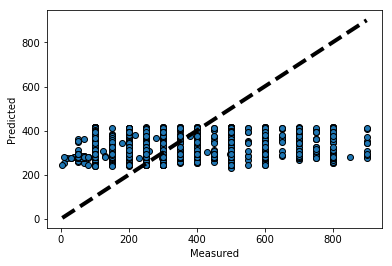

In [125]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr, X_train, y_train, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [126]:
y_pred

array([258.11311622, 257.48824248, 303.80509892, ..., 303.80509892,
       355.49985574, 258.11311622])

In [153]:
np.array(y_test)

array([[300],
       [200],
       [400],
       ...,
       [650],
       [300],
       [100]])

In [156]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

142.53590369494847

In [128]:
Test_df = pd.read_excel("Final_Test.xlsx")

In [129]:
Test_df


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


In [130]:
Test_df['Experience']=Test_df['Experience'].str.replace(" years experience", '').astype(int)

dft = pd.get_dummies(Test_df['Profile'])

dft = pd.concat([Test_df,dft],axis=1)

AttributeError: 'float' object has no attribute 'split'

In [134]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 12 columns):
Qualification         1987 non-null object
Experience            1987 non-null int64
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
Ayurveda              1987 non-null uint8
Dentist               1987 non-null uint8
Dermatologists        1987 non-null uint8
ENT Specialist        1987 non-null uint8
General Medicine      1987 non-null uint8
Homeopath             1987 non-null uint8
dtypes: int64(1), object(5), uint8(6)
memory usage: 104.9+ KB


In [149]:
dft2 = dft['Place'].apply(lambda x: str(x).split(","))
dft['city'] = dft2.apply(lambda x: x[-1])

dft['city'] = dft['city'].str.replace(" Bangalore", 'Bangalore')

dft['city'] = dft['city'].str.replace(" Ernakulam", 'Ernakulam')
dft['city'] = dft['city'].str.replace(" Hyderabad", 'Hyderabad')
dft['city'] = dft['city'].str.replace(" Chennai", 'Chennai')
dft['city'] = dft['city'].str.replace(" Delhi", 'Delhi')
dft['city'] = dft['city'].str.replace(" Mumbai", 'Mumbai')
dft['city'] = dft['city'].str.replace(" Thiruvananthapuram", 'Thiruvananthapuram')
dft['city'] = dft['city'].str.replace(" Coimbatore", 'Coimbatore')

dft = dft.loc[dft['city']!='e']

cityt = pd.get_dummies(dft['city'])

dft = pd.concat([dft,cityt],axis=1)

#df['col'] = df['col'].str.rstrip('%').astype('float') / 100.0
dft['Rating'] = dft['Rating'].str.rstrip('%').astype('float') / 100.0
dft['Rating'] = dft['Rating'].fillna(0)

In [147]:
dft['Place'].apply(lambda x: str(x).split(","))

0                  [Ghatkopar East,  Mumbai]
1             [West Marredpally,  Hyderabad]
2                       [KK Nagar,  Chennai]
3                  [New Ashok Nagar,  Delhi]
4               [Kanakpura Road,  Bangalore]
5                      [Velachery,  Chennai]
6                  [Frazer Town,  Bangalore]
7                      [Attapur,  Hyderabad]
8                 [Banashankari,  Bangalore]
9                 [Mayur Vihar Ph-I,  Delhi]
10                   [Erragadda,  Hyderabad]
11                [Gandhipuram,  Coimbatore]
12                   [Kemps Corner,  Mumbai]
13               [Banjara Hills,  Hyderabad]
14                  [Madandapuram,  Chennai]
15                 [Mukherjee Nagar,  Delhi]
16                      [Tis Hazari,  Delhi]
17      [Banashankari 2nd Stage,  Bangalore]
18                    [Nagawara,  Bangalore]
19                [Basavanagudi,  Bangalore]
20                          [Dadar,  Mumbai]
21          [Kattakada,  Thiruvananthapuram]
22        

In [138]:
dft.columns

Index([u'Qualification', u'Experience', u'Rating', u'Place', u'Profile',
       u'Miscellaneous_Info', u'Ayurveda', u'Dentist', u'Dermatologists',
       u'ENT Specialist', u'General Medicine', u'Homeopath'],
      dtype='object')

In [143]:
dft.Place.unique()

array([u'Ghatkopar East, Mumbai', u'West Marredpally, Hyderabad',
       u'KK Nagar, Chennai', u'New Ashok Nagar, Delhi',
       u'Kanakpura Road, Bangalore', u'Velachery, Chennai',
       u'Frazer Town, Bangalore', u'Attapur, Hyderabad',
       u'Banashankari, Bangalore', u'Mayur Vihar Ph-I, Delhi',
       u'Erragadda, Hyderabad', u'Gandhipuram, Coimbatore',
       u'Kemps Corner, Mumbai', u'Banjara Hills, Hyderabad',
       u'Madandapuram, Chennai', u'Mukherjee Nagar, Delhi',
       u'Tis Hazari, Delhi', u'Banashankari 2nd Stage, Bangalore',
       u'Nagawara, Bangalore', u'Basavanagudi, Bangalore',
       u'Dadar, Mumbai', u'Kattakada, Thiruvananthapuram',
       u'Villivakkam, Chennai', u'Begumpet, Hyderabad',
       u'Kottivakkam, Chennai', u'Jeedimetla, Hyderabad',
       u'Gachibowli, Hyderabad', u'Chromepet, Chennai',
       u'Mulund West, Mumbai', u'Bellandur, Bangalore',
       u'Kukatpally, Hyderabad', u'Chandni Chowk, Delhi',
       u'Vileparle West, Mumbai', u'Sakinaka, Mu

In [146]:
dft.loc[5,'Place'].split(",")

[u'Velachery', u' Chennai']

In [150]:
dft

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Ayurveda,Dentist,Dermatologists,ENT Specialist,...,city,Bangalore,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,nan
0,MBBS,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,0,0,0,0,...,Mumbai,0,0,0,0,0,0,1,0,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,0,0,0,1,...,Hyderabad,0,0,0,0,0,1,0,0,0
2,"MBBS, DDVL",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",0,0,1,0,...,Chennai,0,1,0,0,0,0,0,0,0
3,BAMS,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,1,0,0,0,...,Delhi,0,0,0,1,0,0,0,0,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,...,Bangalore,1,0,0,0,0,0,0,0,0
5,"BDS, MDS",14,0.90,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,0,1,0,0,...,Chennai,0,1,0,0,0,0,0,0,0
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23,0.94,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",0,0,0,1,...,Bangalore,1,0,0,0,0,0,0,0,0
7,"BDS, MDS - Pedodontics",9,0.94,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,0,1,0,0,...,Hyderabad,0,0,0,0,0,1,0,0,0
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11,0.99,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",1,0,0,0,...,Bangalore,1,0,0,0,0,0,0,0,0
9,BHMS,44,0.00,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,0,0,0,0,...,Delhi,0,0,0,1,0,0,0,0,0


In [340]:
dft.loc[dft['Qualification'].str.contains('MD'),'Qualification'] = 'MD'
dft.loc[dft['Qualification'].str.contains('MS - ENT'),'Qualification'] = 'MS - ENT'
dft.loc[dft['Qualification'].str.contains('MS'),'Qualification'] = 'MS'
dft.loc[dft['Qualification'].str.contains('MRCP'),'Qualification'] = 'MRCP'
dft.loc[dft['Qualification'].str.contains('Dentist'),'Qualification'] = 'Dentist'
dft.loc[dft['Qualification'].str.contains('IBCLC'),'Qualification'] = 'IBCLC'
dft.loc[dft['Qualification'].str.contains('Oral implantlogy'),'Qualification'] = 'Oral implantlogy'
dft.loc[dft['Qualification'].str.contains('DDVL'),'Qualification'] = 'DDVL'
dft.loc[dft['Qualification'].str.contains('MBBS'),'Qualification'] = 'MBBS'
dft.loc[dft['Qualification'].str.contains('MDS'),'Qualification'] = 'MDS'
dft.loc[dft['Qualification'].str.contains('FDS'),'Qualification'] = 'FDS'
dft.loc[dft['Qualification'].str.contains('BDS'),'Qualification'] = 'BDS'
dft.loc[dft['Qualification'].str.contains('MSc'),'Qualification'] = 'MSc'
dft.loc[dft['Qualification'].str.contains('BHMS'),'Qualification'] = 'BHMS'
dft.loc[dft['Qualification'].str.contains('DNB - ENT'),'Qualification'] = 'DNB - ENT'
dft.loc[dft['Qualification'].str.contains('DLO'),'Qualification'] = 'DLO'
dft.loc[dft['Qualification'].str.contains('DNB'),'Qualification'] = 'DNB'
dft.loc[dft['Qualification'].str.contains('ENT'),'Qualification'] = 'ENT'
dft.loc[dft['Qualification'].str.contains('Dermatology'),'Qualification']= 'Dermatology'
dft.loc[dft['Qualification'].str.contains('M.D'),'Qualification'] = 'MD'
dft.loc[dft['Qualification'].str.contains('GCEH'),'Qualification'] = 'GCEH'
dft.loc[dft['Qualification'].str.contains('LCEH'),'Qualification'] = 'LCEH'
dft.loc[dft['Qualification'].str.contains('BNYS'),'Qualification'] = 'BNYS'
dft.loc[dft['Qualification'].str.contains('PhD'),'Qualification'] = 'PhD'
dft.loc[dft['Qualification'].str.contains('G.A.M.S'),'Qualification'] = 'G.A.M.S'
dft.loc[dft['Qualification'].str.contains('implantlogy'),'Qualification'] = 'implantlogy'
dft.loc[dft['Qualification'].str.contains('experience'),'Qualification'] = 'experience'

dft['Qualification'].value_counts()

MD                                                       762
MS                                                       600
MBBS                                                     350
BDS                                                      185
DDVL                                                      60
Dentist                                                    8
Get inspired by remarkable stories of people like you      6
LCEH                                                       5
implantlogy                                                4
Diploma in Ayurvedic Medicine (DAM)                        1
FRCS - General Surgery                                     1
Dermatology                                                1
BSAM                                                       1
MRCP                                                       1
FWFO, FPFA                                                 1
FICD                                                       1
Name: Qualification, dty

In [535]:
le.fit(dft['Qualification'])
dft['label'] = le.transform(dft['Qualification'])

In [537]:
dft['label'].value_counts()


12    762
14    600
11    350
0     185
2      60
3       8
9       6
10      5
15      4
13      1
8       1
7       1
6       1
5       1
4       1
1       1
Name: label, dtype: int64

In [538]:
test_ = dft[['Experience','Rating','Ayurveda','Dentist','Dermatologists',
               'ENT Specialist','General Medicine','Homeopath','Bangalore',
                'Chennai','Coimbatore','Delhi','Ernakulam','Hyderabad','Mumbai',
               'Thiruvananthapuram','label']]

In [539]:
xg_reg.predict(test_.values)

XGBoostError: need to call fit or load_model beforehand

In [207]:
dft.to_csv('test.csv',encoding='utf-8')

In [158]:
fees = regr.predict(test_)

In [159]:
fees = list(fees)

In [162]:
pd.DataFrame({'Fees':fees}).to_excel('result1_RFreg.xlsx')